In [149]:
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import json
import os
import time
import random
import sys

In [150]:
current_date = f"{time.localtime().tm_year}-{time.localtime().tm_mon}-{time.localtime().tm_mday}"
# path = pathlib.Path(__file__).parent.absolute() # works only with python skript
path = "/Users/vs21/track_your_learning"

In [151]:
def read_csv(path):
    # reads the study csv and returns a list with dict
    collect = []

    with open (path, "r", newline="") as file:
        reader = csv.DictReader(file)
        for row in reader:
            collect.append(row)

    return collect

In [152]:
def write_new_file(path, questions):
    with open (path, "w", newline="") as file:
        fieldnames = list(questions[0])
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for question in questions:
            print(question)
            writer.writerow(question)

In [153]:
def find_directories(path):
    collect = []
    for dirs in os.walk(path):
        dir_ = dirs[0]
        if "." not in dir_:
            collect.append(dir_)  

    return collect

In [154]:
find_directories("/Users/vs21/track_your_learning/data")

['/Users/vs21/track_your_learning/data',
 '/Users/vs21/track_your_learning/data/Topic_2',
 '/Users/vs21/track_your_learning/data/Topic_2/Sub_Topic_1',
 '/Users/vs21/track_your_learning/data/Topic_2/Sub_Topic_1/Sub_Sub_Topic_1',
 '/Users/vs21/track_your_learning/data/Topic_2/Sub_Topic_1/Sub_Sub_Topic_2',
 '/Users/vs21/track_your_learning/data/Topic_1',
 '/Users/vs21/track_your_learning/data/Topic_1/Sub_Topic_1',
 '/Users/vs21/track_your_learning/data/Topic_1/Sub_Topic_1/Sub_Sub_Topic_1',
 '/Users/vs21/track_your_learning/data/Topic_1/Sub_Topic_1/Sub_Sub_Topic_2']

In [155]:
# check in for loop if there is a study.csv
def check_for_studyFile(path):
    for element in os.listdir(path):
        if element == "study.csv": return True

In [156]:
check_for_studyFile("/Users/vs21/track_your_learning/data/Topic_1")

True

In [157]:
def find_all_studyFiles(path):
    collect = []
    for dir in find_directories("/Users/vs21/track_your_learning/data"):
        if check_for_studyFile(dir) == True:
            collect.append(dir + "/study.csv")
            
    return collect

In [158]:
find_all_studyFiles(path)

['/Users/vs21/track_your_learning/data/Topic_2/study.csv',
 '/Users/vs21/track_your_learning/data/Topic_2/Sub_Topic_1/Sub_Sub_Topic_1/study.csv',
 '/Users/vs21/track_your_learning/data/Topic_2/Sub_Topic_1/Sub_Sub_Topic_2/study.csv',
 '/Users/vs21/track_your_learning/data/Topic_1/study.csv',
 '/Users/vs21/track_your_learning/data/Topic_1/Sub_Topic_1/Sub_Sub_Topic_1/study.csv',
 '/Users/vs21/track_your_learning/data/Topic_1/Sub_Topic_1/Sub_Sub_Topic_2/study.csv']

In [164]:
def analyze_studyFiles(all_studyFiles):
    collect = []

    for studyFile in find_all_studyFiles(path):
        all_questions = read_csv(studyFile)
        x = list(all_questions[0])[3:]
        collect_ = []
        for _ in x:
            y = [] 
            for element in all_questions:
                y.append(element[_])
            all_f = y.count('f')
            all_t = y.count('t')
            collect_.append(all_t / (all_t + all_f))
        collect.append({"file":studyFile, "x":x, "y":collect_})
            


    return collect

In [165]:
study_files = analyze_studyFiles(find_all_studyFiles(path))
study_files[3]

{'file': '/Users/vs21/track_your_learning/data/Topic_1/study.csv',
 'x': ['2023-5-18',
  '2023-5-19',
  '2023-5-20',
  '2023-5-21',
  '2023-5-22',
  '2023-5-23',
  '2023-5-24',
  '2023-5-25',
  '2023-5-26',
  '2023-5-27',
  '2023-5-28',
  '2023-5-29',
  '2023-5-30'],
 'y': [1.0, 0.0, 0.0, 0.4, 0.6, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

In [172]:
def plot_learningProgress(study_file):

    title = study_file["file"].replace(path, "").replace("study.csv", "")

    x = study_file["x"]
    y = study_file["y"]

    plt.title(title) 
    plt.ylim(-0.1,1.1)
    plt.plot(x, y)
    plt.xticks(rotation=90)

    plt.savefig(study_file["file"].replace("study.csv", "learning_progress.pdf"))

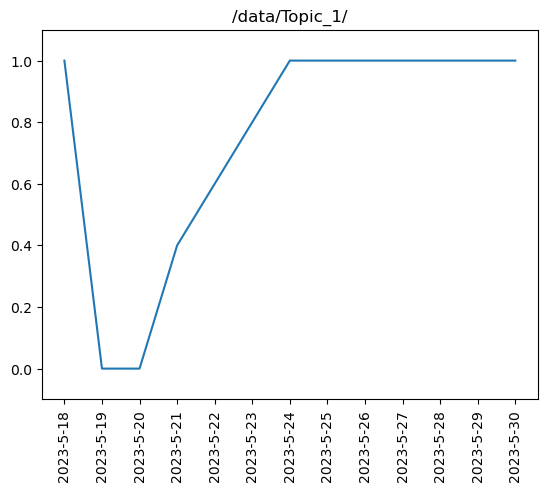

In [173]:
plot_learningProgress(study_files[3])

# bug fixing

In [175]:
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import json
import os
import time
import random
import sys

current_date = f"{time.localtime().tm_year}-{time.localtime().tm_mon}-{time.localtime().tm_mday}"
# path = pathlib.Path(__file__).parent.absolute() # works only with python skript
path = "/Users/vs21/track_your_learning" # for notebook

def read_csv(path):
    # reads the study csv and returns a list with dict
    collect = []

    with open (path, "r", newline="") as file:
        reader = csv.DictReader(file)
        for row in reader:
            collect.append(row)

    return collect


def write_new_file(path, questions):
    with open (path, "w", newline="") as file:
        fieldnames = list(questions[0])
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for question in questions:
            print(question)
            writer.writerow(question)


def find_directories(path):
    collect = []
    for dirs in os.walk(path):
        dir_ = dirs[0]
        if "." not in dir_:
            collect.append(dir_)  

    return collect


def check_for_studyFile(path):
    # check in for loop if there is a study.csv 
    for element in os.listdir(path):
        if element == "study.csv": return True

def find_all_studyFiles(path):
    collect = []
    for dir in find_directories("/Users/vs21/track_your_learning/data"):
        if check_for_studyFile(dir) == True:
            collect.append(dir + "/study.csv")
            
    return collect

def analyze_studyFiles(all_studyFiles):
    collect = []

    for studyFile in find_all_studyFiles(path):
        all_questions = read_csv(studyFile)
        x = list(all_questions[0])[3:]
        collect_ = []
        for _ in x:
            y = [] 
            for element in all_questions:
                y.append(element[_])
            all_f = y.count('f')
            all_t = y.count('t')
            collect_.append(all_t / (all_t + all_f))
        collect.append({"file":studyFile, "x":x, "y":collect_})
            
    return collect


def plot_learningProgress(study_file):

    title = study_file["file"].replace(str(path), "").replace("study.csv", "")

    x = study_file["x"]
    y = study_file["y"]

    plt.title(title) 
    plt.ylim(-0.1,1.1)
    plt.plot(x, y)
    plt.xticks(rotation=90)

    # plt.savefig(study_file["file"].replace("study.csv", "learning_progress.pdf"))






In [177]:
all_dir = find_directories(path)
all_dir


['/Users/vs21/track_your_learning',
 '/Users/vs21/track_your_learning/data',
 '/Users/vs21/track_your_learning/data/Topic_2',
 '/Users/vs21/track_your_learning/data/Topic_2/Sub_Topic_1',
 '/Users/vs21/track_your_learning/data/Topic_2/Sub_Topic_1/Sub_Sub_Topic_1',
 '/Users/vs21/track_your_learning/data/Topic_2/Sub_Topic_1/Sub_Sub_Topic_2',
 '/Users/vs21/track_your_learning/data/Topic_1',
 '/Users/vs21/track_your_learning/data/Topic_1/Sub_Topic_1',
 '/Users/vs21/track_your_learning/data/Topic_1/Sub_Topic_1/Sub_Sub_Topic_1',
 '/Users/vs21/track_your_learning/data/Topic_1/Sub_Topic_1/Sub_Sub_Topic_2']

In [178]:
study_files = analyze_studyFiles(all_dir)
study_files


[{'file': '/Users/vs21/track_your_learning/data/Topic_2/study.csv',
  'x': ['2023-5-18', '2023-5-19', '2023-5-20'],
  'y': [0.0, 0.0, 0.6]},
 {'file': '/Users/vs21/track_your_learning/data/Topic_2/Sub_Topic_1/Sub_Sub_Topic_1/study.csv',
  'x': ['2023-5-18', '2023-5-19', '2023-5-20'],
  'y': [1.0, 0.0, 0.6]},
 {'file': '/Users/vs21/track_your_learning/data/Topic_2/Sub_Topic_1/Sub_Sub_Topic_2/study.csv',
  'x': ['2023-5-18', '2023-5-19', '2023-5-20'],
  'y': [1.0, 0.0, 0.6]},
 {'file': '/Users/vs21/track_your_learning/data/Topic_1/study.csv',
  'x': ['2023-5-18',
   '2023-5-19',
   '2023-5-20',
   '2023-5-21',
   '2023-5-22',
   '2023-5-23',
   '2023-5-24',
   '2023-5-25',
   '2023-5-26',
   '2023-5-27',
   '2023-5-28',
   '2023-5-29',
   '2023-5-30'],
  'y': [1.0, 0.0, 0.0, 0.4, 0.6, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]},
 {'file': '/Users/vs21/track_your_learning/data/Topic_1/Sub_Topic_1/Sub_Sub_Topic_1/study.csv',
  'x': ['2023-5-18', '2023-5-19', '2023-5-20'],
  'y': [0.0, 0.0, 0.

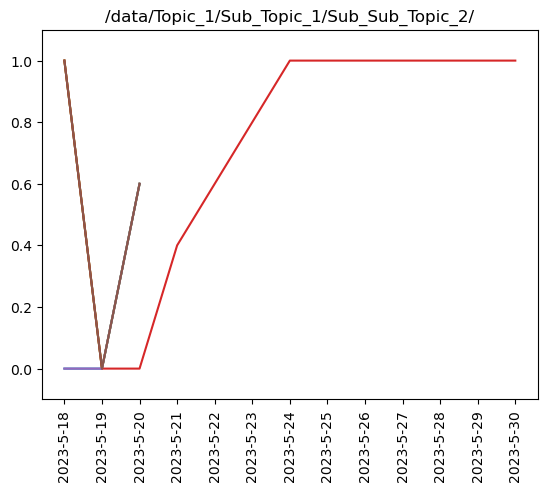

In [179]:
for study_file in study_files:
    plot_learningProgress(study_file)

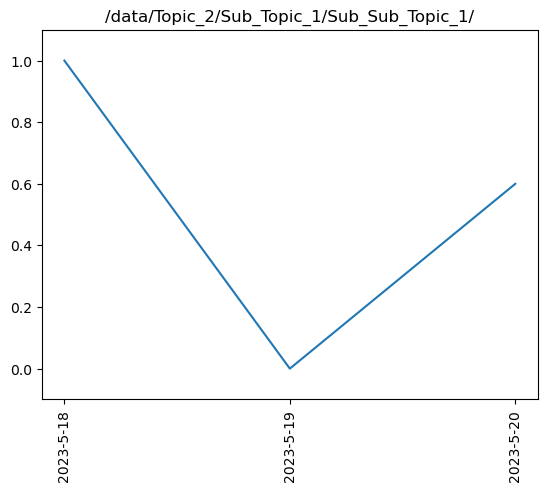

In [182]:
plot_learningProgress(study_files[1])